# Script to create composites of SST gradient based on ENSO phase

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import xarray as xr

from grad_funcs import get_gs_coords_alltime,get_total_gradient

In [137]:
## months to perform analysis, for full year set analysis_months = range(1,13)

analysis_months = [2]


dslink = '/Users/noahrosenberg/Downloads/era5_reanalysis_every_6hours.nc'#era5_sst_1940_2022_1deg.nc'

ds = xr.load_dataset(f'{sstlink}',engine='netcdf4')
ds = sst.where(sst.time.dt.month.isin(analysis_months))

/Users/noahrosenberg/miniconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [146]:
ds.longitude

<xarray.DataArray 'longitude' (longitude: 249)>
array([-76.  , -75.75, -75.5 , ..., -14.5 , -14.25, -14.  ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -76.0 -75.75 -75.5 ... -14.5 -14.25 -14.0
Attributes:
    units:      degrees_east
    long_name:  longitude

In [140]:
sst = ds.sst

In [141]:
## get dates from Nino script and dataarray into same format

nino_dates = np.load('ninodates.npy')

nino_months = nino_dates.astype('datetime64[M]')

year0 = sst.time.dt.year.min()
year0 = int(year0)

nino_indices = nino_months.astype('int')+(1970-year0)*12

sst_month_indices = (sst.time.dt.year-1940)*12 + sst.time.dt.month

sst_nino = sst.where(sst_month_indices.isin(nino_indices),drop=True)
sst_nino = sst_nino

/Users/noahrosenberg/miniconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


/Users/noahrosenberg/miniconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


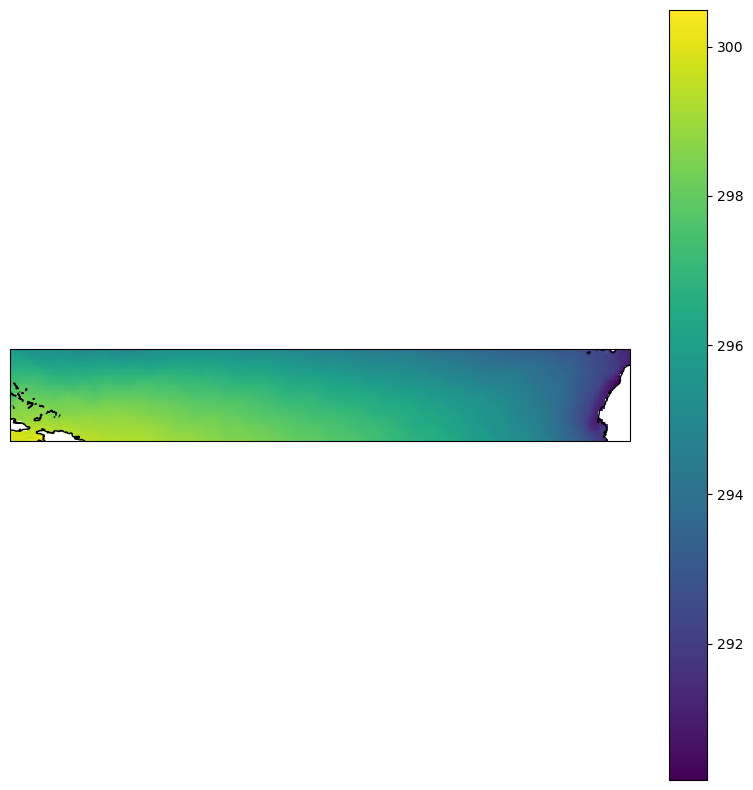

In [144]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(sst_nino.longitude,sst_nino.latitude,sst_nino.mean('time'),transform=ccrs.PlateCarree())
#im2 = ax.contour(sst.lon,sst.lat,tot_grad.mean('time'),levels=(1,288),c='r')

#ax.set_extent((-80,-40,20,75))
plt.colorbar(im,ax=ax)
ax.coastlines()

In [147]:
nina_dates = np.load('ninadates.npy')

nina_months = nina_dates.astype('datetime64[M]')

year0 = sst.time.dt.year.min()
year0 = int(year0)

nina_indices = nina_months.astype('int')+(1970-year0)*12

sst_month_indices = (sst.time.dt.year-1940)*12 + sst.time.dt.month

sst_nina = sst.where(sst_month_indices.isin(nina_indices),drop=True)

/Users/noahrosenberg/miniconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/Users/noahrosenberg/miniconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


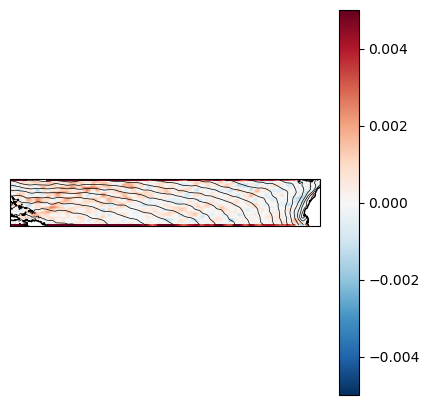

In [154]:
from matplotlib import colors

# plot difference in gradients between 2 composites

nina_grad = get_total_gradient(sst_nina,1,latname='latitude',lonname='longitude').mean('time')
nino_grad = get_total_gradient(sst_nino,1,latname='latitude',lonname='longitude').mean('time')

fig,ax = plt.subplots(figsize=(5,5),subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(sst_nina.longitude,sst_nina.latitude,
                   nino_grad-nina_grad,
                   transform=ccrs.PlateCarree(),
                   vmin=-0.005,vmax=0.005,cmap="RdBu_r")#,norm=colors.CenteredNorm(0,1),cmap='RdBu_r')
im2 = ax.contour(sst.longitude,sst.latitude,sst.mean('time'),levels=20,colors='k',linewidths=0.5)

#im2 = ax.contour(sst.lon,sst.lat,tot_grad.mean('time'),levels=(1,288),c='r')

#ax.set_extent((-80,-40,20,75))
plt.colorbar(im,ax=ax)
ax.coastlines()